# __YÜKSEK DAYANIMLI BETON__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [2]:
cc = pd.read_csv('concrete_clean.csv')

In [3]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [53]:
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [11]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [13]:
xgbRegressor = xgb.XGBRegressor(objective = 'reg:squarederror', seed = 42)

xgbRegressor.fit(x_train,y_train)
y_pred = xgbRegressor.predict(x_test)

np.sqrt(MSE(y_test, y_pred))

4.579941401648326

In [14]:
concrete_dm = xgb.DMatrix(data = X, label = Y)
params = {'objective' : 'reg:squarederror', 'max_depth' : 5}
concrete_cv = xgb.cv(dtrain = concrete_dm, params = params, nfold = 5, 
                  num_boost_round = 200, early_stopping_rounds = 10, metrics = 'rmse', as_pandas = True, seed = 42)
concrete_cv.sort_values(by = 'test-rmse-mean').head(5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
122,1.183,0.135,4.177,0.428
121,1.187,0.135,4.178,0.426
119,1.196,0.133,4.179,0.426
118,1.201,0.132,4.179,0.429
117,1.206,0.132,4.179,0.430


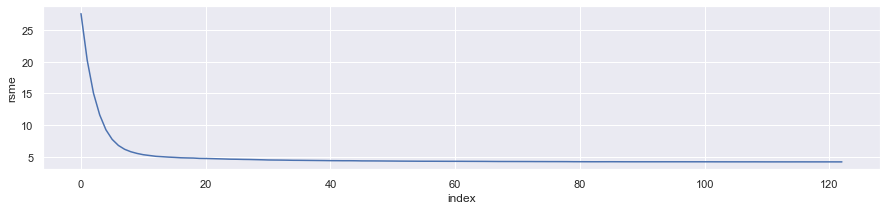

In [15]:
plt.figure(figsize=(15,3))
#rsme
plt.plot(concrete_cv.index, concrete_cv['test-rmse-mean'])
plt.xlabel('index')
plt.ylabel('rsme')
plt.show()

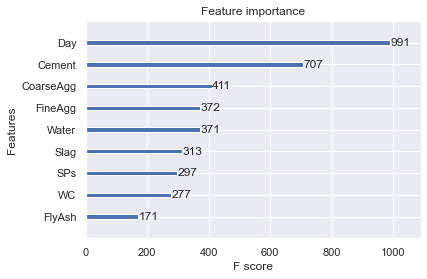

In [17]:
xgb.plot_importance(xgbRegressor)
plt.show()

# __BANKA KAMPANYASI__

In [60]:
bk = pd.read_csv('bank_clean.csv')

In [61]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,...,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,...,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,...,0,0,1,0,0,0,0,1,0,0


In [68]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [39]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [70]:
xgbClassifier = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42)

xgbClassifier.fit(x_train,y_train)
y_pred = xgbClassifier.predict(x_test)

np.sqrt(MSE(y_test, y_pred))

0.31538838096986904

In [42]:
bank_dm = xgb.DMatrix(data = X, label = Y)
params = {'objective' : 'binary:logistic', 'max_depth' : 5}
concrete_cv = xgb.cv(dtrain = bank_dm, params = params, nfold = 5, 
                  num_boost_round = 50, early_stopping_rounds = 5, metrics = 'auc', as_pandas = True, seed = 42)
concrete_cv.sort_values(by = 'test-auc-mean').tail(5)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
10,0.808,0.002,0.793,0.008
12,0.811,0.002,0.794,0.009
11,0.810,0.002,0.794,0.009
13,0.812,0.002,0.795,0.009
14,0.813,0.002,0.795,0.009


In [43]:
bank_dm = xgb.DMatrix(data = X, label = Y)
params = {'objective' : 'binary:logistic', 'max_depth' : 5}
concrete_cv = xgb.cv(dtrain = bank_dm, params = params, nfold = 5, 
                  num_boost_round = 50, early_stopping_rounds = 5, metrics = 'error', as_pandas = True, seed = 42)
concrete_cv.sort_values(by = 'test-error-mean').head(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
9,0.094,0.001,0.097,0.004
4,0.095,0.001,0.097,0.004
6,0.095,0.001,0.097,0.004
8,0.095,0.001,0.097,0.004
5,0.095,0.001,0.097,0.004


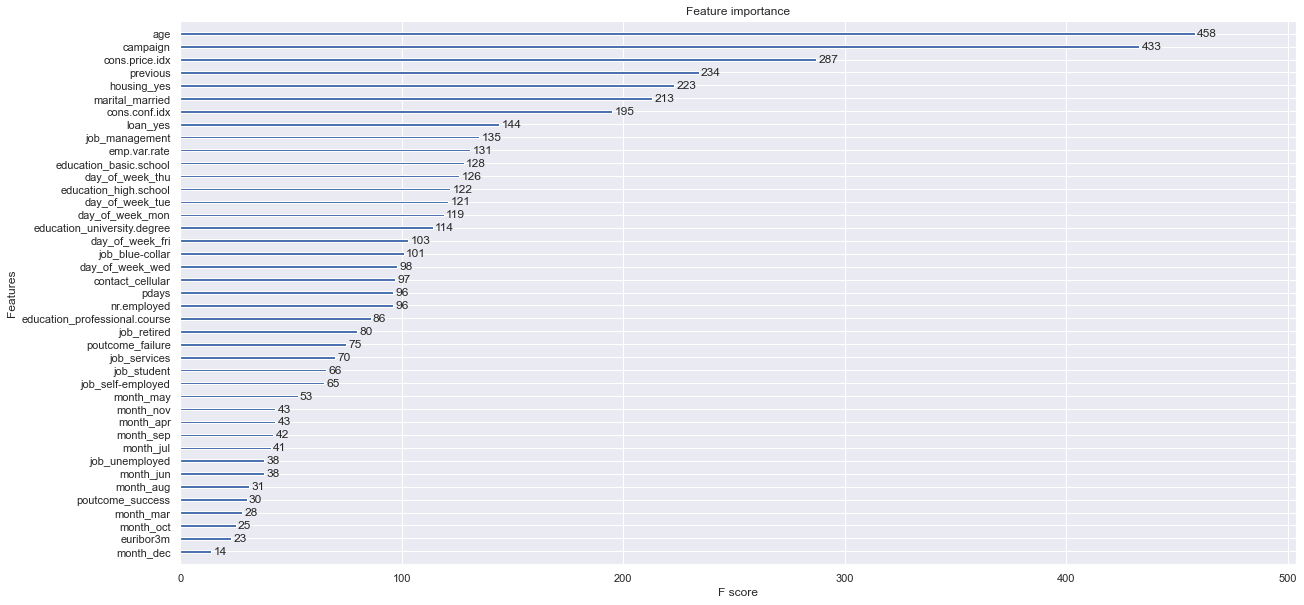

In [74]:
ax = xgb.plot_importance(xgbClassifier)
ax.figure.set_size_inches(20,10)
plt.show()